<a href="https://colab.research.google.com/github/Paumtzv/Proyecto-Final-Deep-Learning1/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recreación Práctica 3

In [ ]:
# escribir sus nombres en las variables y ejecutar la celda
name1 = 'Paulina Martínez Vázquez'
name2 = 'Freya Melissa López Flores'
print(name1,name2)

Paulina Martínez Vázquez Freya Melissa López Flores


In [1]:
from sklearn.datasets import load_sample_image #imágenes de ejemplo para probar cosas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from tensorflow import keras
import random
import pandas as pd

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [6]:
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [7]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0 #Se agarran 5000 datos para tener y otros para entrenar
y_valid, y_train = y_train[:5000], y_train[5000:]

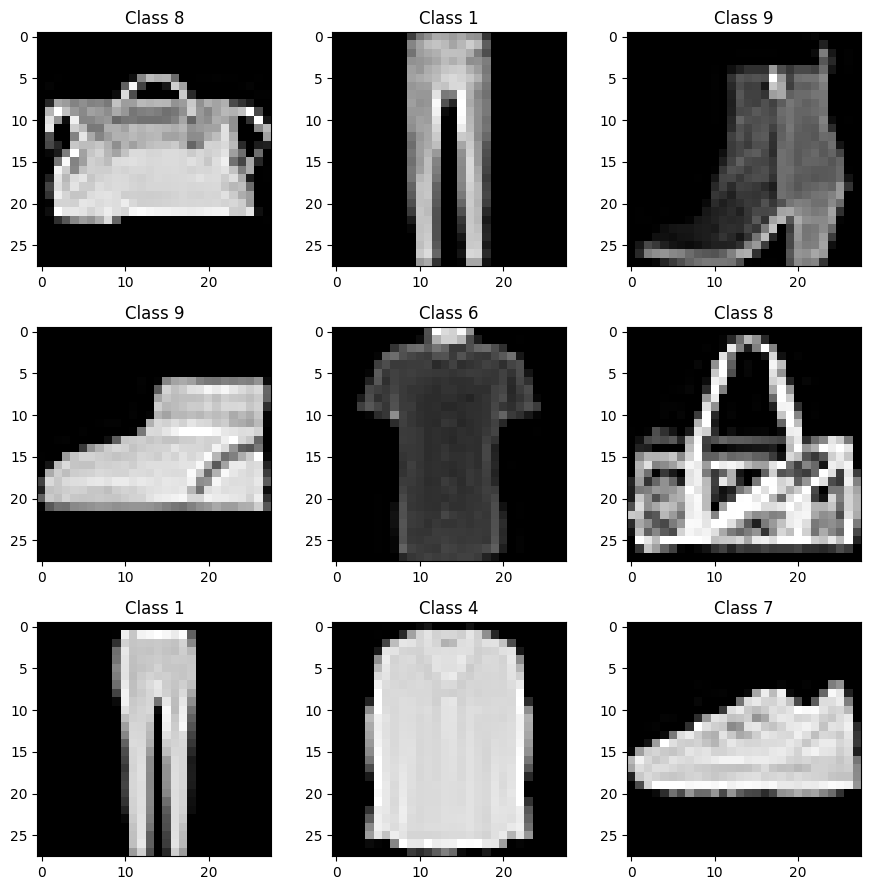

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [ ]:
#implementamos el modelo dado por la práctica
model = keras.models.Sequential() #crea un modelo secuencial, el más simple en Keras
model.add(keras.layers.Flatten(input_shape = (28,28))) # la capa de entrada, Flatten covierte las imagenes en objetos de una dimension
model.add(keras.layers.Dense(300, kernel_initializer = 'he_normal', activation = 'relu')) # la capa con 300 neuronas y ReLU
model.add(keras.layers.Dropout(0.2)) #se añade dropout
model.add(keras.layers.Dense(100, activation='relu')) # segunda capa con 100 neuronas y relu
model.add(keras.layers.Dropout(0.2)) #se añade dropout
model.add(keras.layers.Dense(10, activation='softmax')) # la capa de salida, una neurona por clase

In [ ]:
#se añade el callback del early stopping, con paciencia de dos epochs
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)

In [ ]:
#compilar el modelo (funcion de perdida y para optimizar y con que evaluar)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid), callbacks=[callback])

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.8668 - accuracy: 0.7008 - val_loss: 0.5421 - val_accuracy: 0.8174
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5760 - accuracy: 0.7991 - val_loss: 0.4601 - val_accuracy: 0.8436
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5118 - accuracy: 0.8215 - val_loss: 0.4288 - val_accuracy: 0.8528
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4713 - accuracy: 0.8328 - val_loss: 0.4058 - val_accuracy: 0.8604
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4450 - accuracy: 0.8427 - val_loss: 0.3834 - val_accuracy: 0.8670
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4273 - accuracy: 0.8485 - val_loss: 0.3724 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4091 - accuracy: 0.8541 - val_loss: 0.3646 - val_accuracy:

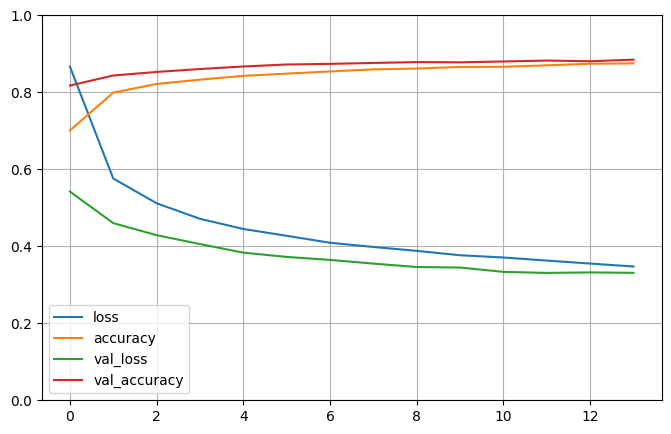

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0.0,1) # modifica el rango del eje y
plt.show()

Igual que Scikit Learn, es posible predecir las etiquetas del conjunto de prueba. Noten que regresa un arreglo con todas las predicciones.

In [ ]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [17]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [ ]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 62.5259 - accuracy: 0.8284


[62.525943756103516, 0.8284000158309937]

## Cinco predicciones que realiza el modelo con el conjunto de prueba

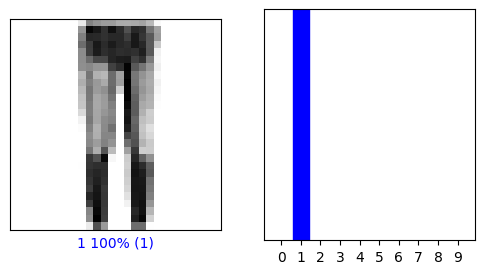

In [ ]:
i = 3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

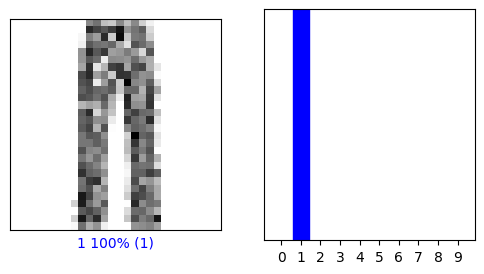

In [ ]:
i = 128

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

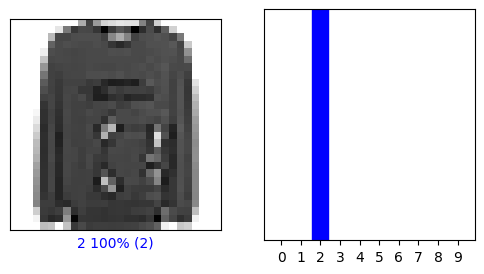

In [ ]:
i = 46

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

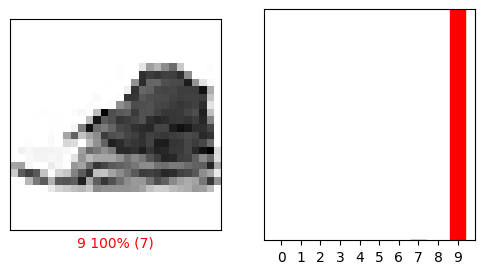

In [ ]:
i = 705

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

En este entrenamiento se observan áreas de mejora, ya que el modelo no tiene bien definido si es la clase 9 (bota) o la clase 7 (tenis).

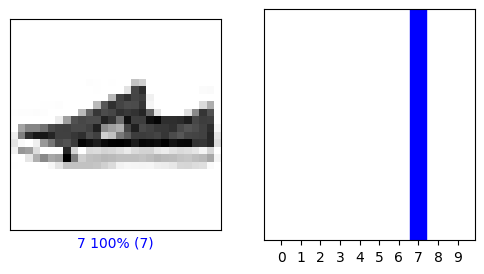

In [ ]:
i = 333

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

# Propuesta de red neuronal convolucional

## Arquitectura vista en clase

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[28,28,1]), # 64 filtros de tamaño 7x7
    keras.layers.MaxPooling2D(2), #maxpool de tamaño 2x2 con salto de 2, divide cada dimensión espacial en dos
    keras.layers.Conv2D(128, 3, activation='relu', padding = 'same'), # misma estructura que se repite dos veces
    keras.layers.Conv2D(128, 3, activation='relu', padding = 'same'), # el número de capas es un hiperparámetro por ajustar
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same'), # el número de filtros aumenta para capturar características más complejas
    keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(), #se aplasta para hacerlo en un vector
    keras.layers.Dense(128, activation = 'relu'), # perceptron multicapa para clasificar
    keras.layers.Dropout(0.5), #de regular, evitar sobreajuste, se le permite un error
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
]) #Se hacen capas convucionales 2D, los filtros son los pesos

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 19s 9ms/step - loss: 1.1930 - accuracy: 0.5517 - val_loss: 0.6452 - val_accuracy: 0.7598
Epoch 2/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.6724 - accuracy: 0.7509 - val_loss: 0.4932 - val_accuracy: 0.8216
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5537 - accuracy: 0.7985 - val_loss: 0.4435 - val_accuracy: 0.8384
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4907 - accuracy: 0.8206 - val_loss: 0.3911 - val_accuracy: 0.8586
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4490 - accuracy: 0.8357 - val_loss: 0.3633 - val_accuracy: 0.8646
Epoch 6/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4175 - accuracy: 0.8480 - val_loss: 0.3536 - val_accuracy: 0.8670
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3941 - accuracy: 0.8573 - val_loss: 0.3289 - val_ac

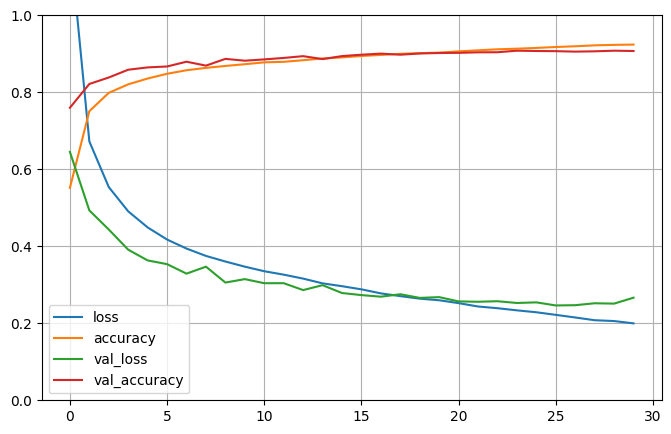

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0.0,1) # modifica el rango del eje y
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 38.5281 - accuracy: 0.8735


[38.52810287475586, 0.8734999895095825]

## Propuesta red neuronal convolucional

In [8]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, activation='relu', padding = 'same', input_shape=(28, 28, 1)),  # Capa convolucional con 32 filtros de 3x3
    keras.layers.MaxPooling2D(2),  # Capa de pooling para reducir la dimensionalidad
    keras.layers.Conv2D(64, 3, activation='relu', padding = 'same'),  # Segunda capa convolucional
    keras.layers.MaxPooling2D(2),  # Segunda capa de pooling
    keras.layers.Conv2D(64, 3, activation='relu', padding = 'same'),  # Tercera capa convolucional
    keras.layers.Flatten(),  # Aplanar la salida de las capas convolucionales
    keras.layers.Dense(64, activation='relu'),  # Capa densa con 64 neuronas
    keras.layers.Dense(10, activation='softmax')  # Capa de salida con 10 neuronas para las 10 clases
])

In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 85s 49ms/step - loss: 0.8445 - accuracy: 0.6941 - val_loss: 0.5185 - val_accuracy: 0.8124
Epoch 2/30
1719/1719 [==============================] - 77s 45ms/step - loss: 0.4885 - accuracy: 0.8215 - val_loss: 0.4280 - val_accuracy: 0.8452
Epoch 3/30
1719/1719 [==============================] - 76s 44ms/step - loss: 0.4187 - accuracy: 0.8488 - val_loss: 0.3742 - val_accuracy: 0.8682
Epoch 4/30
1719/1719 [==============================] - 82s 47ms/step - loss: 0.3791 - accuracy: 0.8634 - val_loss: 0.3801 - val_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 75s 44ms/step - loss: 0.3521 - accuracy: 0.8721 - val_loss: 0.3455 - val_accuracy: 0.8762
Epoch 6/30
1719/1719 [==============================] - 78s 45ms/step - loss: 0.3322 - accuracy: 0.8792 - val_loss: 0.3220 - val_accuracy: 0.8834
Epoch 7/30
1719/1719 [==============================] - 77s 45ms/step - loss: 0.3152 - accuracy: 0.8861 - val_loss: 0.3097 -

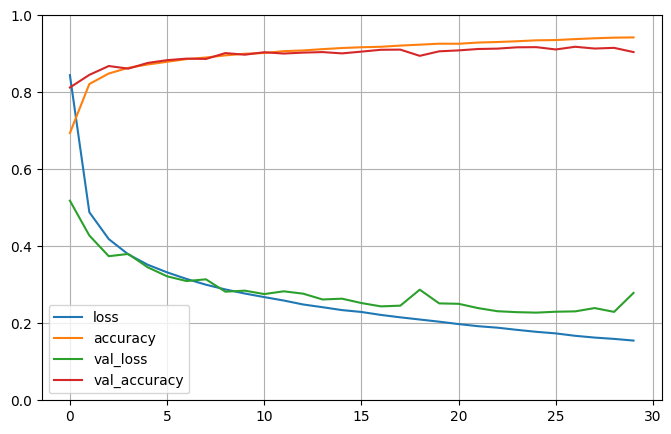

In [11]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0.0,1) # modifica el rango del eje y
plt.show()

In [12]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 58.8917 - accuracy: 0.8595


[58.89168930053711, 0.859499990940094]

### Cinco predicciones con propuesta

In [13]:
predictions = model.predict(X_test)

313/313 [==============================] - 4s 12ms/step


In [14]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [15]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

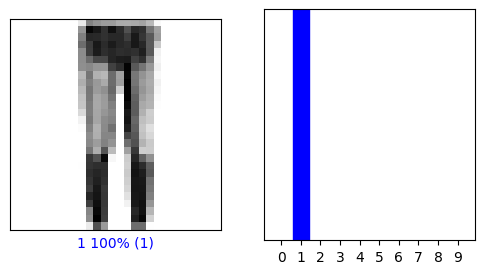

In [18]:
i = 3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

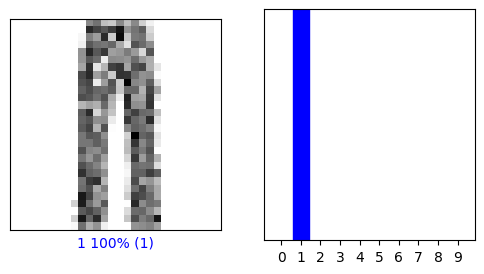

In [19]:
i = 128

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

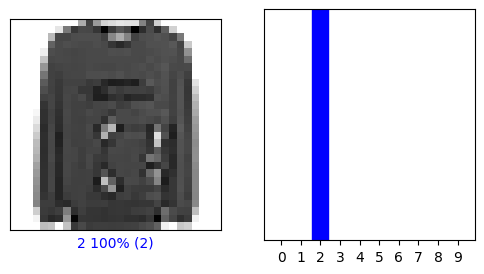

In [20]:
i = 46

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

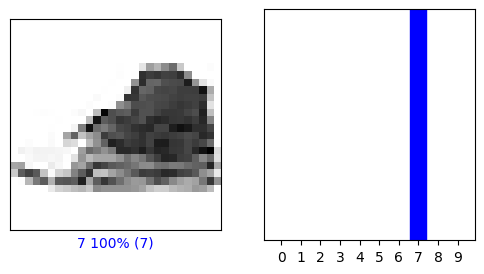

In [21]:
i = 705

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

Aqui podemos ver que al aumentar el accuracy de 0.8284000158309937 a 0.859499990940094 se entrena mejor el modelo y puede predecir correctamente la clase de la imagen.

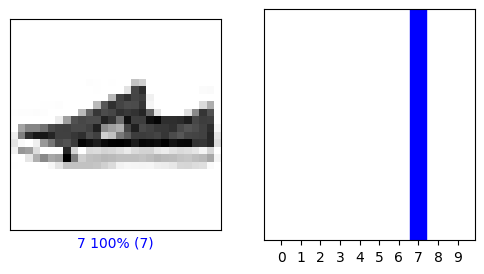

In [22]:
i = 333

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

# Red Neuronal Convolucional ya entrenado


In [2]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("fashion_mnist", as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.MN9207_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.MN9207_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
info.splits

{Split('train'): <SplitInfo num_examples=60000, num_shards=1>,
 Split('test'): <SplitInfo num_examples=10000, num_shards=1>}

In [4]:
class_names = info.features["label"].names
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
n_classes = info.features["label"].num_classes
n_classes

10

In [6]:
dataset_size = info.splits["train"].num_examples
dataset_size

60000

In [7]:
#estamos cargando los datos y asignando 10,15,70 en el split
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "fashion_mnist",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

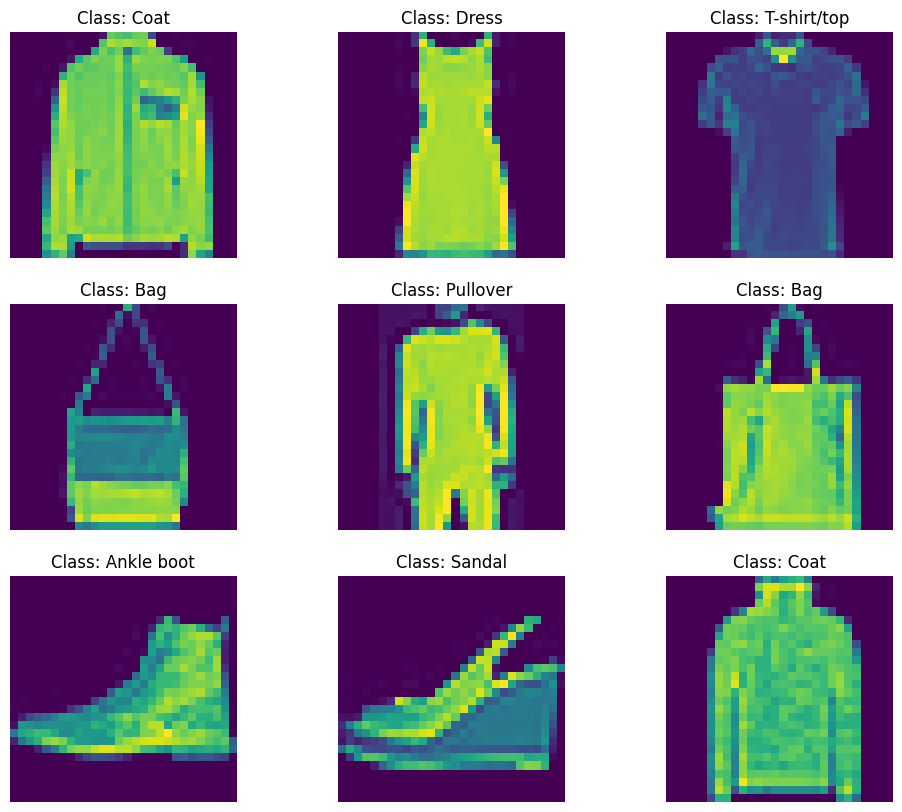

In [8]:
plt.figure(figsize=(12, 10))
index = 0
for image, label in train_set_raw.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")

plt.show()

In [9]:
#mezclado
def preprocess(image, label):
    image = tf.image.grayscale_to_rgb(image) ## Se utilizó ChatGPT para esta línea de código para modificar las imagenes a una escala de grises, ya que corriera el modelo en el siguiente history.
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

In [10]:
batch_size = 32
train_set = train_set_raw.shuffle(1000).repeat()
train_set = train_set.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

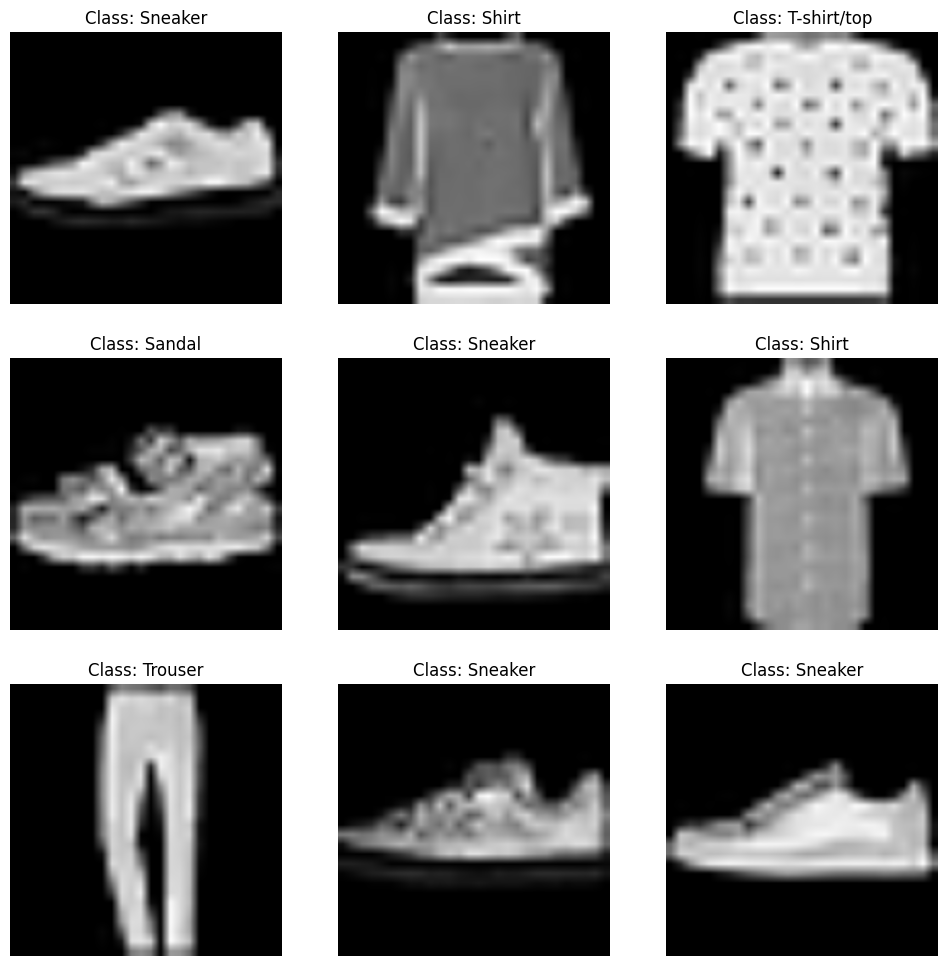

In [11]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in train_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

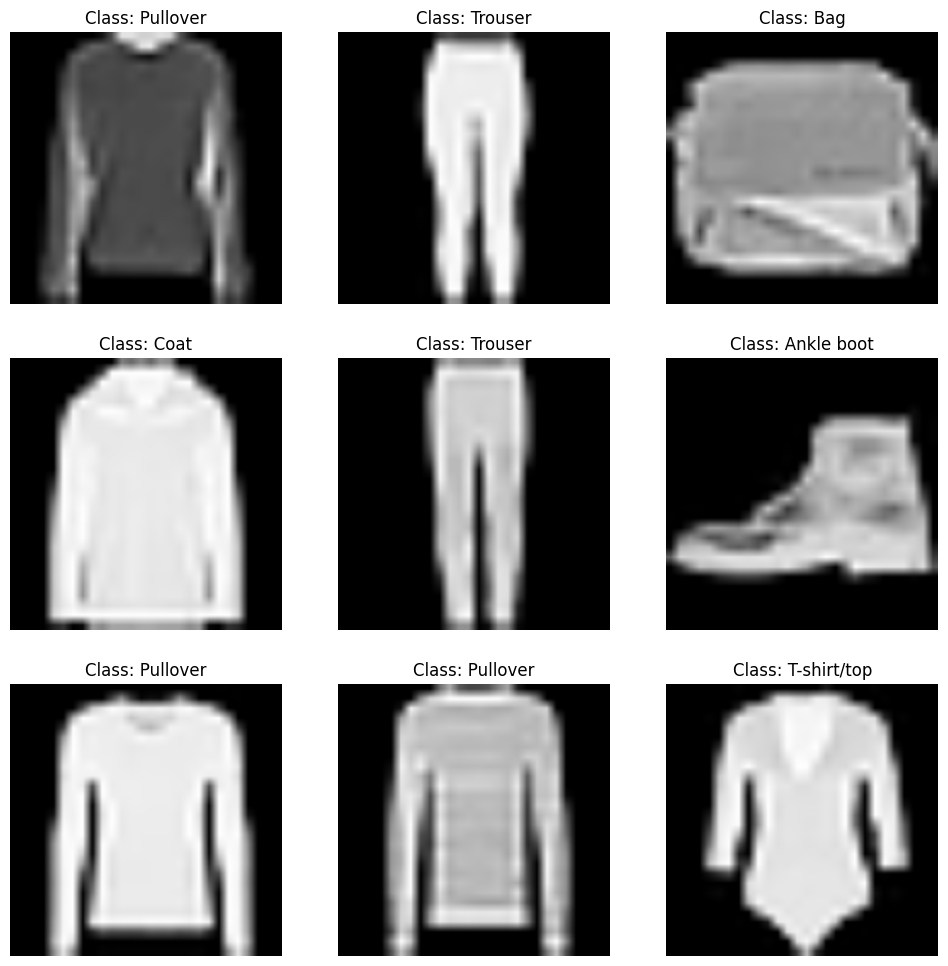

In [12]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in test_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

Vol

In [13]:
base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(10, activation="softmax")(avg)
model = keras.models.Model(inputs=base_model.input, outputs=output)

83683744/83683744 [==============================] - 0s 0us/step


In [14]:
for layer in base_model.layers:
    layer.trainable = False

In [15]:
optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [16]:
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=5)


Epoch 1/5
1406/1406 [==============================] - 221s 151ms/step - loss: 2.1877 - accuracy: 0.8014 - val_loss: 2.5692 - val_accuracy: 0.8093
Epoch 2/5
1406/1406 [==============================] - 210s 150ms/step - loss: 1.9068 - accuracy: 0.8419 - val_loss: 1.7563 - val_accuracy: 0.8528
Epoch 3/5
1406/1406 [==============================] - 212s 151ms/step - loss: 1.5761 - accuracy: 0.8592 - val_loss: 1.9959 - val_accuracy: 0.8421
Epoch 4/5
1406/1406 [==============================] - 210s 149ms/step - loss: 1.6789 - accuracy: 0.8604 - val_loss: 1.8019 - val_accuracy: 0.8632
Epoch 5/5
1406/1406 [==============================] - 217s 154ms/step - loss: 1.6240 - accuracy: 0.8681 - val_loss: 1.9316 - val_accuracy: 0.8490


In [17]:
for layer in base_model.layers:
    layer.trainable = True

In [18]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,
                                 nesterov=True)

In [19]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=5)

Epoch 1/5
1406/1406 [==============================] - 709s 487ms/step - loss: 0.3041 - accuracy: 0.8965 - val_loss: 0.2041 - val_accuracy: 0.9266
Epoch 2/5
1406/1406 [==============================] - 690s 491ms/step - loss: 0.1585 - accuracy: 0.9421 - val_loss: 0.1915 - val_accuracy: 0.9312
Epoch 3/5
1406/1406 [==============================] - 690s 491ms/step - loss: 0.1133 - accuracy: 0.9587 - val_loss: 0.2091 - val_accuracy: 0.9297
Epoch 4/5
1406/1406 [==============================] - 689s 490ms/step - loss: 0.0826 - accuracy: 0.9690 - val_loss: 0.2802 - val_accuracy: 0.9230
Epoch 5/5
1096/1406 [======================>.......] - ETA: 2:22 - loss: 0.0659 - accuracy: 0.9755

In [ ]:
predictions = model.predict(X_batch)

1/1 [==============================] - 1s 835ms/step


In [ ]:
model.evaluate(test_set)

188/188 [==============================] - 31s 163ms/step - loss: 0.3106 - accuracy: 0.9415


[0.31057488918304443, 0.9415000081062317]

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [ ]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

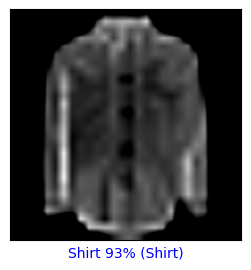

In [ ]:
i = 25
plt.figure(figsize=(6,3))
plot_image(i, predictions[i], y_batch, X_batch)
plt.show()

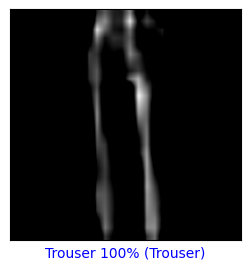

In [ ]:
i = 17
plt.figure(figsize=(6,3))
plot_image(i, predictions[i], y_batch, X_batch)
plt.show()

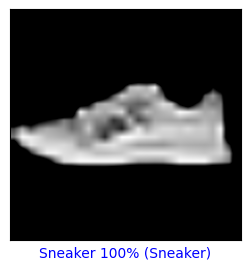

In [ ]:
i = 31
plt.figure(figsize=(6,3))
plot_image(i, predictions[i], y_batch, X_batch)
plt.show()

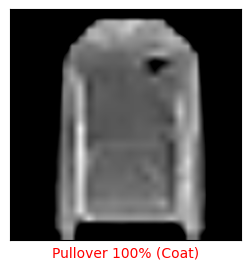

In [ ]:
i = 26
plt.figure(figsize=(6,3))
plot_image(i, predictions[i], y_batch, X_batch)
plt.show()

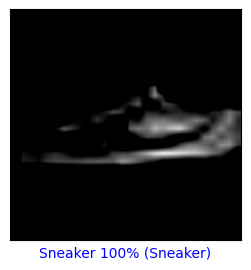

In [ ]:
i = 23
plt.figure(figsize=(6,3))
plot_image(i, predictions[i], y_batch, X_batch)
plt.show()

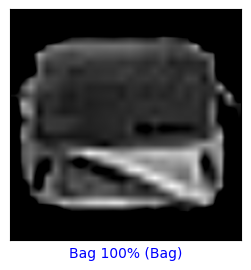

In [ ]:
i = 2
plt.figure(figsize=(6,3))
plot_image(i, predictions[i], y_batch, X_batch)
plt.show()

# Sección nueva

313/313 [==============================] - 7s 21ms/step


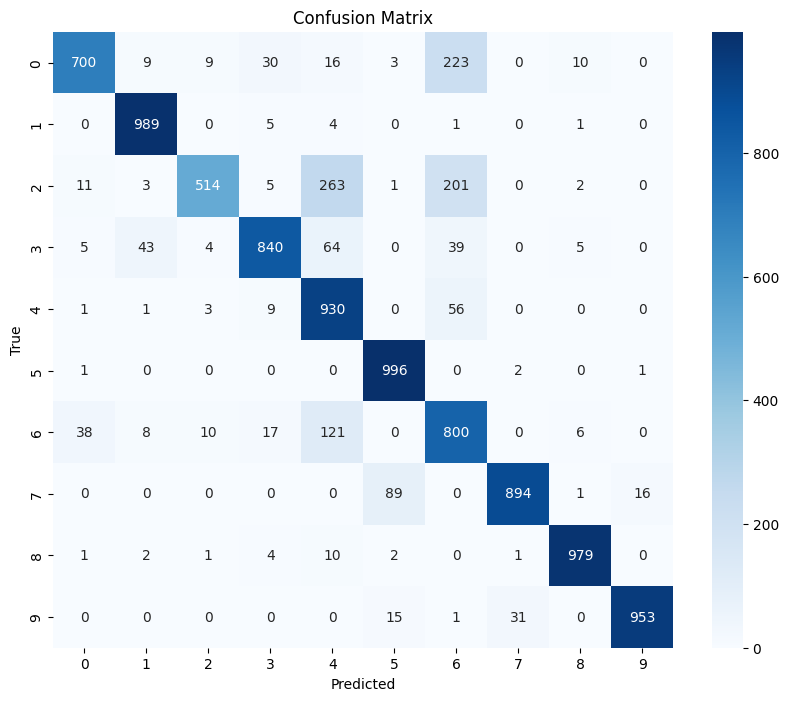

              precision    recall  f1-score   support

     Class 0       0.92      0.70      0.80      1000
     Class 1       0.94      0.99      0.96      1000
     Class 2       0.95      0.51      0.67      1000
     Class 3       0.92      0.84      0.88      1000
     Class 4       0.66      0.93      0.77      1000
     Class 5       0.90      1.00      0.95      1000
     Class 6       0.61      0.80      0.69      1000
     Class 7       0.96      0.89      0.93      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.98      0.95      0.97      1000

    accuracy                           0.86     10000
   macro avg       0.88      0.86      0.86     10000
weighted avg       0.88      0.86      0.86     10000



In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Realiza predicciones sobre el conjunto de datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcula la matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred_classes)

# Visualiza la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Genera un informe de clasificación
report = classification_report(y_test, y_pred_classes, target_names=[f'Class {i}' for i in range(10)])
print(report)